In [2]:
import re
import matplotlib.pyplot as plt
import pandas as pd 
from bs4 import BeautifulSoup as bs
import requests

http://s.cafef.vn/hose/FPT-cong-ty-co-phan-fpt.chn
http://s.cafef.vn/hose/VJC-cong-ty-co-phan-hang-khong-vietjet.chn
http://s.cafef.vn/hose/HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn


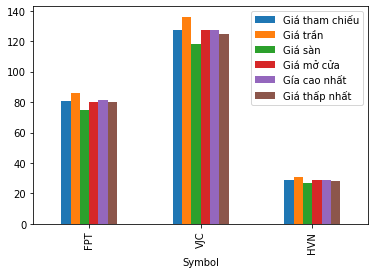

In [4]:
list_com_interests = [
    {'symbol':'FPT','link':'FPT-cong-ty-co-phan-fpt.chn'},
    {'symbol':'VJC','link':'VJC-cong-ty-co-phan-hang-khong-vietjet.chn'},
    {'symbol':'HVN','link':'HVN-tong-cong-ty-hang-khong-viet-nam-ctcp.chn'}
]



symbol = []
gtc = []
gt = []
gs = []
gmc = []
gcn = []
gtn = []

for com in list_com_interests:
    row = com['symbol']
    URL_INFO ='http://s.cafef.vn/hose/{}'.format(com['link'])
    print(URL_INFO)
    r = requests.get(URL_INFO)
    soup = bs(r.text,'html.parser')
    
    div_dltl = soup.find('div','dltl-price')
    for li_tag in div_dltl.select('ul > li'):
        childs = li_tag.find_all('div')
        if len(childs) == 2:
            key = childs[0].text.strip()
            value = re.sub(r'\s+','',childs[1].text)
            if key == 'Giá tham chiếu':
                gtc.append(float(value))
            elif key == "Giá trần":
                gt.append(float(value))
            elif key == "Giá sàn":
                gs.append(float(value))
            elif key == "Giá mở cửa":
                gmc.append(float(value))
            elif key == "Giá cao nhất":
                gcn.append(float(value))
            elif key == "Giá thấp nhất":
                gtn.append(float(value))
    symbol.append(row)
    
    
df = pd.DataFrame()
df['Giá tham chiếu'] = gtc
df['Giá trần'] = gt
df['Giá sàn'] = gs
df['Giá mở cửa'] = gmc
df['Gía cao nhất'] = gcn
df['Giá thấp nhất']= gtn

df.to_csv('data.csv')
# Vẽ biểu đồ
df.index = symbol
df.plot.bar()
plt.xlabel('Symbol')
plt.show()
        